# Dogs of Zurich

## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Import Data

In [2]:
d2015 = pd.read_csv('data/20151001hundehalter.csv')
d2016 = pd.read_csv('data/20160307hundehalter.csv')
d2017 = pd.read_csv('data/20170308hundehalter.csv')
#metadata = pd.read_csv('data/zuordnungstabellehunderassehundetyp.csv')

### Merge Data and change column names

In [3]:
df =pd.concat([d2015,d2016,d2017])
df.columns=['ID',
            'Age',
            'Gender',
            'City_District',
            'City_Quarter',
            'Primary_Breed',
            'Primary_Breed_Mixed',
            'Secondary_Breed',
            'Secondary_Breed_Mixed',
            'Breed_Type',
            'Dog_Birth_Year',
            'Dog_Gender',
            'Dog_Color']

In [4]:
df.head()

,ID,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Secondary_Breed_Mixed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
0,126,51-60,m,9.0,92.0,Welsh Terrier,NaN,NaN,NaN,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,NaN,NaN,NaN,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,NaN,NaN,NaN,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,NaN,NaN,NaN,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,NaN,NaN,NaN,K,2011,m,schwarz/weiss


### Initial Data Checks

In [5]:
print('Shape')
print(df.shape)
print('-----------------------')
print('Info')
print(df.info())
print('-----------------------')
print('Stats')     
print(df.describe())
print('-----------------------')
print('dtypes')
print(df.dtypes)

Shape
(21065, 13)
-----------------------
Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21065 entries, 0 to 7154
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     21065 non-null  int64  
 1   Age                    21060 non-null  object 
 2   Gender                 21065 non-null  object 
 3   City_District          21060 non-null  float64
 4   City_Quarter           21060 non-null  float64
 5   Primary_Breed          21065 non-null  object 
 6   Primary_Breed_Mixed    1939 non-null   object 
 7   Secondary_Breed        1590 non-null   object 
 8   Secondary_Breed_Mixed  0 non-null      float64
 9   Breed_Type             20891 non-null  object 
 10  Dog_Birth_Year         21065 non-null  int64  
 11  Dog_Gender             21065 non-null  object 
 12  Dog_Color              21065 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 2.2+ MB
Non

# Questions
1. What trends exist between owners and dog breeds?
    -Age and breeds?
    -Gender and breeds?
    -Location and breeds?
2. is there a relationship between breed, dog gender and dog color?

# Cleaning Up the Data

In [6]:
#check for nulls
df.isnull().sum()/ df.shape[0] * 100

ID                         0.000000
Age                        0.023736
Gender                     0.000000
City_District              0.023736
City_Quarter               0.023736
Primary_Breed              0.000000
Primary_Breed_Mixed       90.795158
Secondary_Breed           92.451934
Secondary_Breed_Mixed    100.000000
Breed_Type                 0.826015
Dog_Birth_Year             0.000000
Dog_Gender                 0.000000
Dog_Color                  0.000000
dtype: float64

### Secondary_Breed_Mixed

In [7]:
df.drop(columns='Secondary_Breed_Mixed',inplace=True)

In [8]:
#Cleaning the Primary_Breed_Mixed column 
#Setting Mischling to 'Mixed', null to 'Pure'

### Primary_Breed_Mixed

Mischling is german for mixed, so we'll set those values to "mixed" and the others (na's) to "pure"

In [9]:
df.loc[df.Primary_Breed_Mixed=='Mischling','Primary_Breed_Mixed'] ='Mixed'
df.Primary_Breed_Mixed.fillna('Pure',inplace=True)

In [10]:
df.Primary_Breed_Mixed.unique()

array(['Pure', 'Mixed'], dtype=object)

### Age

In [11]:
df.Age.unique()

array(['51-60', '61-70', '41-50', '71-80', '31-40', '81-90', '21-30',
       '91-100', nan, '11-20'], dtype=object)

In [12]:
df[df.Age.isnull()].index

Int64Index([1348, 2556, 1273, 2407, 2234], dtype='int64')

In [13]:
#Since the missing are so small (.02 %), we'll delete those missing rows
df.drop(df[df.Age.isnull()].index,inplace=True)

In [14]:
df.Age.isnull().sum()

0

### City Quarter & City District


City Quarter and District are missing .009% of values. We'll just remove from the dataset

In [15]:
i=[]
missingQ = df[df.City_Quarter.isnull()].index
missingD = df[df.City_District.isnull()].index
list(zip(missingQ,missingD))

[(36, 36), (34, 34)]

In [16]:
df.drop(index=[34,36],inplace=True)

### Breed Type

Droping null values, .52% of values are null

In [17]:
df.drop(df[df.Breed_Type.isnull()].index,inplace=True)

### Secondary Breed

In [18]:
df.Secondary_Breed.value_counts()

Labrador Retriever          119
Golden Retriever             67
Pudel                        67
Chihuahua                    64
Schäfer                      62
                           ... 
American Pitbull Terrier      1
Lhasa Apso                    1
Welsh Corgi                   1
Harzer Fuchs                  1
Podenco Ibicenco              1
Name: Secondary_Breed, Length: 130, dtype: int64

In [19]:
# do any na's exist when the primary breed does not equal pure? if no, then we can set Secondary Breed to "None"
df.loc[(df.Secondary_Breed.isnull()) & (df.Primary_Breed_Mixed != 'Pure')]

,ID,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
9,4215,41-50,w,8.0,81.0,Bergamasker,Mixed,NaN,I,2004,w,schwarz
10,4215,41-50,w,8.0,81.0,Border Collie,Mixed,NaN,I,2001,m,schwarz
11,4215,41-50,w,8.0,81.0,Bergamasker,Mixed,NaN,I,2001,w,grau/braun
12,4239,61-70,w,10.0,102.0,Pinscher,Mixed,NaN,K,2013,w,braun/schwarz
41,6629,51-60,w,4.0,41.0,Spitz,Mixed,NaN,K,1997,w,hellbraun
...,...,...,...,...,...,...,...,...,...,...,...,...
7044,135039,21-30,w,11.0,111.0,Labrador Retriever,Mixed,NaN,I,2011,m,schwarz/weiss
7132,135618,31-40,m,9.0,91.0,Cocker Spaniel,Mixed,NaN,K,2016,m,choco
7145,135694,21-30,m,10.0,102.0,Spitz,Mixed,NaN,K,2014,w,braun
7148,135697,31-40,m,10.0,102.0,Labrador Retriever,Mixed,NaN,I,2012,m,braun/weiss


In [20]:
df.Secondary_Breed.fillna('None',inplace=True)

In [21]:
df.head()

,ID,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Breed_Type,Dog_Birth_Year,Dog_Gender,Dog_Color
0,126,51-60,m,9.0,92.0,Welsh Terrier,Pure,None,K,2011,w,schwarz/braun
1,574,61-70,w,2.0,23.0,Cairn Terrier,Pure,None,K,2002,w,brindle
2,695,41-50,m,6.0,63.0,Labrador Retriever,Pure,None,I,2012,w,braun
3,893,61-70,w,7.0,71.0,Mittelschnauzer,Pure,None,I,2010,w,schwarz
4,1177,51-60,m,10.0,102.0,Shih Tzu,Pure,None,K,2011,m,schwarz/weiss


In [22]:
#investigate unique counts for each col
for col in df.columns[1:]:
    print(col)
    print(df[col].value_counts())
    print('----------------------')

Age
51-60     4440
41-50     4358
31-40     3860
61-70     3004
21-30     2296
71-80     1903
81-90      497
11-20      122
91-100      43
Name: Age, dtype: int64
----------------------
Gender
w    14127
m     6396
Name: Gender, dtype: int64
----------------------
City_District
11.0    3436
7.0     2917
9.0     2462
10.0    1987
3.0     1884
2.0     1788
12.0    1457
6.0     1451
4.0     1087
8.0     1082
5.0      620
1.0      352
Name: City_District, dtype: int64
----------------------
City_Quarter
92.0     1593
101.0    1366
111.0    1201
119.0    1198
115.0    1037
74.0     1027
21.0      874
91.0      869
61.0      793
31.0      788
72.0      727
71.0      686
63.0      655
34.0      642
122.0     631
102.0     621
24.0      552
42.0      511
123.0     495
73.0      477
33.0      454
44.0      411
83.0      383
23.0      362
82.0      358
81.0      341
121.0     331
52.0      324
51.0      296
11.0      191
41.0      162
13.0       83
14.0       55
12.0       23
4.0         3
6.0  

In [23]:
datetime.now().year

2023

In [24]:
#add a col for age and remove birth year
df['Dog_Age']= datetime.now().year - df['Dog_Birth_Year']
df.drop(columns='Dog_Birth_Year',inplace=True)

In [25]:
df.head()

,ID,Age,Gender,City_District,City_Quarter,Primary_Breed,Primary_Breed_Mixed,Secondary_Breed,Breed_Type,Dog_Gender,Dog_Color,Dog_Age
0,126,51-60,m,9.0,92.0,Welsh Terrier,Pure,None,K,w,schwarz/braun,12
1,574,61-70,w,2.0,23.0,Cairn Terrier,Pure,None,K,w,brindle,21
2,695,41-50,m,6.0,63.0,Labrador Retriever,Pure,None,I,w,braun,11
3,893,61-70,w,7.0,71.0,Mittelschnauzer,Pure,None,I,w,schwarz,13
4,1177,51-60,m,10.0,102.0,Shih Tzu,Pure,None,K,m,schwarz/weiss,12


In [26]:
#set Age to a category
df.Age = df.Age.astype('category')

# Exploratory Data Analysis

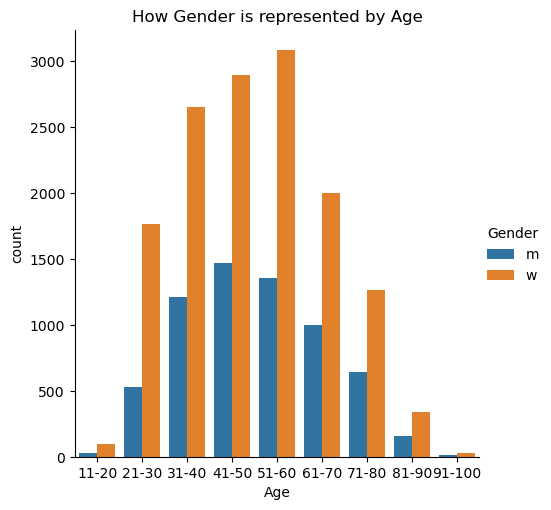

In [27]:
# gender by age for dog owners
plt.clf
sns.catplot(data=df,kind='count',x='Age',hue='Gender')
plt.title('How Gender is represented by Age')
plt.show()

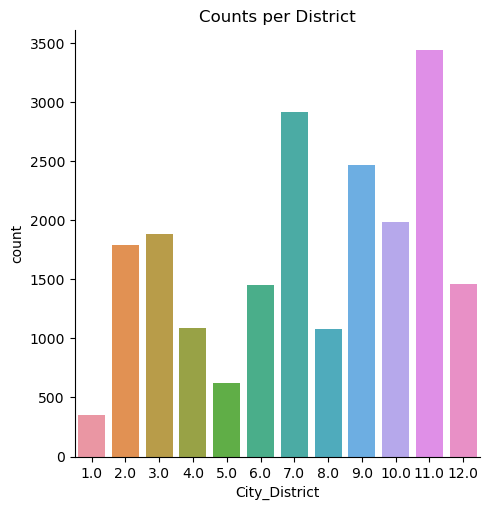

In [28]:
plt.clf
sns.catplot(data=df,kind='count',x='City_District')
plt.title('Counts per District')
plt.show()

<Figure size 2000x1000 with 0 Axes>

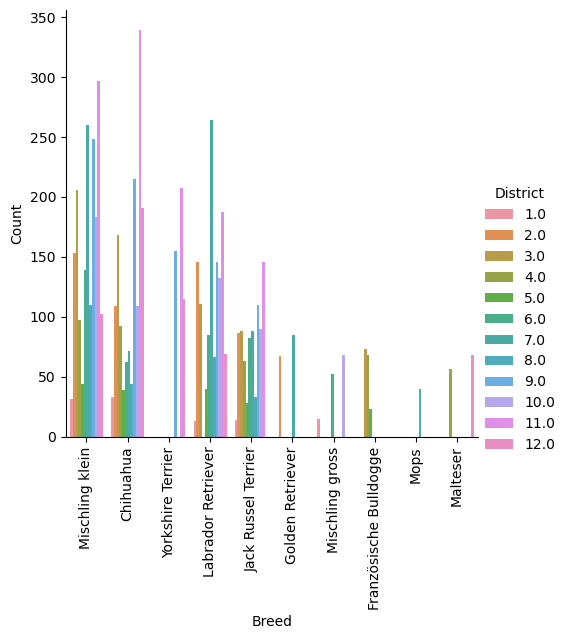

In [69]:
plt.clf
appended_data = []
for dis in df.City_District.unique():
    City_counts_df= pd.DataFrame(df.loc[df.City_District ==dis,'Primary_Breed'].value_counts\
             (ascending=False).head(5)).reset_index().rename(columns={'index':'Breed','Primary_Breed':'Count'})
    City_counts_df['District'] = dis
    appended_data.append(City_counts_df)
appended_data = pd.concat(appended_data)    
appended_data[['District','Breed','Count']].sort_values(['District','Count'],ascending=[True,False])

plt.figure(figsize=(20,10))
sns.catplot(data=appended_data,kind='bar',y='Count',x='Breed',hue='District')
#sns.catplot(data=appended_data,kind='bar',x='District',y='Count',hue='Breed')
plt.xticks(rotation=90)
plt.show()
